In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('Processed_data.csv', index_col=[0])
df.head()

,birth_attendant,birth_place,bmi,cigs_before_preg,birthweight_g,last_norm_menses_mn,last_norm_menses_yr,marital_stat,birth_mn,birth_time,...,prior_births_dead,prior_births_living,prior_terminations,prepreg_weight,delivery_method,res_status,prev_cesarean,num_prev_cesareans,infant_sex,weight_gain
0,1.0,1.0,27.0,0.0,2570.0,12.0,2017.0,2.0,9.0,1426.0,...,0.0,0.0,1.0,110.0,1.0,2.0,0.0,0.0,1.0,64.0
1,1.0,1.0,24.0,0.0,3410.0,8.0,2017.0,1.0,5.0,915.0,...,0.0,0.0,1.0,224.0,1.0,2.0,0.0,0.0,1.0,45.0
2,1.0,1.0,29.0,0.0,2041.0,6.0,2018.0,2.0,7.0,636.0,...,0.0,0.0,0.0,153.0,1.0,1.0,0.0,0.0,0.0,36.0
3,1.0,1.0,32.0,0.0,4054.0,8.0,2018.0,2.0,1.0,642.0,...,0.0,1.0,0.0,155.0,1.0,2.0,0.0,0.0,1.0,0.0
4,1.0,1.0,34.0,0.0,3850.0,4.0,2017.0,1.0,5.0,2301.0,...,0.0,2.0,0.0,106.0,1.0,1.0,0.0,0.0,0.0,25.0


In [7]:
X = df.drop(['birthweight_g'], axis=1)
y = df['birthweight_g']

In [8]:
X_scaled = StandardScaler().fit_transform(X)

In [9]:
scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

In [10]:
pca = PCA(n_components=5)

X_pca = pca.fit_transform(X_scaled)

In [11]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.03062465, 0.03008535, 0.02831821, 0.02760271, 0.02697393])

In [12]:
#These 5 principal components only explain 14% of the variance.. not good 
sum(explained_variance)*100

14.360485063719041

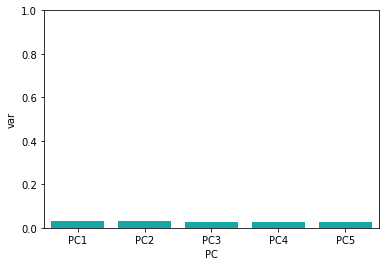

In [13]:
pca_df = pd.DataFrame({'var':explained_variance,
             'PC':['PC1','PC2','PC3','PC4','PC5']})

sns.barplot(x='PC', y="var", data=pca_df, color="c").set(ylim=(0, 1));

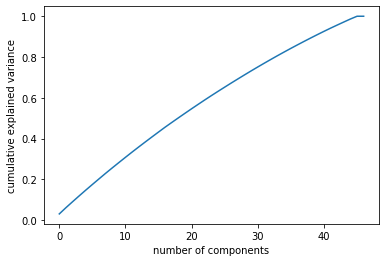

In [14]:
pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

* Could try randomised PCA etc.?